In [1]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('motorcycle_model_ready_data')

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
keepidx = (df.title.drop_duplicates().index)
df = df.loc[keepidx].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 27767
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17583 entries, 0 to 17582
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           17583 non-null  object 
 1   year            17583 non-null  float64
 2   price           17583 non-null  float64
 3   neighborhood    15711 non-null  object 
 4   description     17583 non-null  object 
 5   url             17583 non-null  object 
 6   model           17583 non-null  object 
 7   vin             17583 non-null  int64  
 8   condition       17583 non-null  int64  
 9   cryptocurrency  17583 non-null  int64  
 10  delivery        17583 non-null  int64  
 11  engine_size     17583 non-null  float64
 12  fuel_type       16897 non-null  object 
 13  mileage         17583 non-null  float64
 14  color           17543 non-null  object 
 15  street_legal    17583 non-null  int64  
 16  title_status    17567 non-null  object 
 17  transmission    17583 non-null 

In [8]:
cat_features = ['title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'delivery', 'fuel_type', 'color', 'street_legal', 'title_status', 'transmission', 'bike_type']
cat_sub_features = [ 'bobbe', 'cafe ', 'chopp', 'cruis', 'dirtb', 'dual-', 'moped', 'other', 'scoot', 'sport', 'stand', 'stree', 'touri', 'trike', 'black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange', 'purple', 'red', 'silver', 'white', 'yellow', 'diesel', 'electric', 'gas', 'hybrid', 'other.1']
num_features = ['year', 'price', 'condition', 'mileage', 'engine_size']

In [9]:
len(cat_features)+len(num_features) + len(cat_sub_features)

49

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


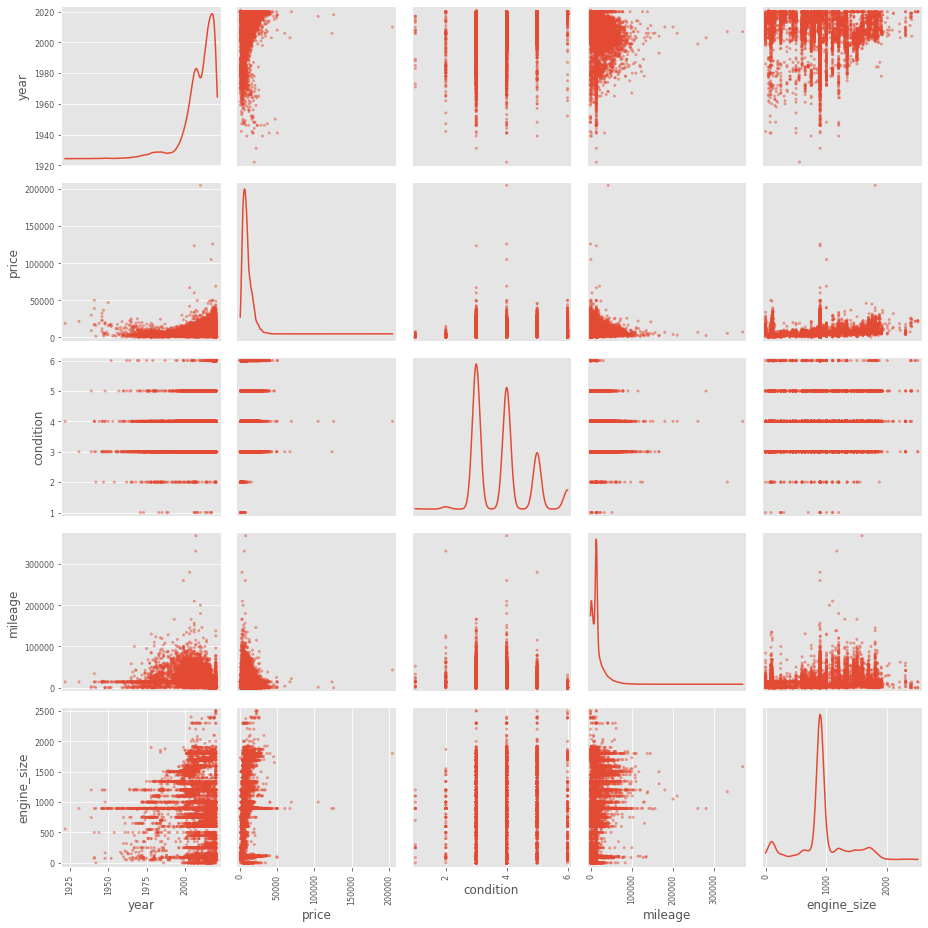

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(13, 13))
plt.xlabel("Numerical Features")
plt.ylabel("Numerical Features")
plt.title("Motorcycle Dataframe Scatter Matrix")
ax = pd.plotting.scatter_matrix(df[num_features], ax=ax, diagonal='kde')
plt.tight_layout()
plt.show()

In [11]:

ax = df[num_features].hist(bins=10)
plt.tight_layout()

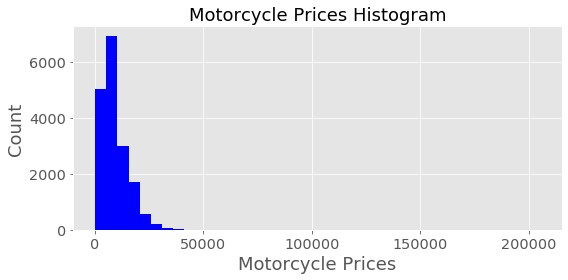

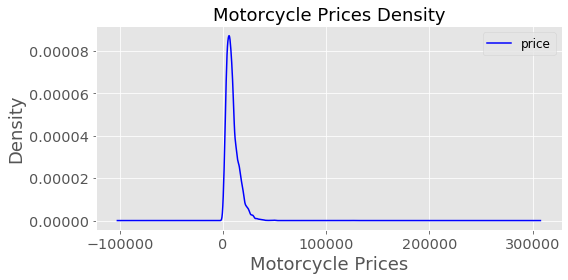

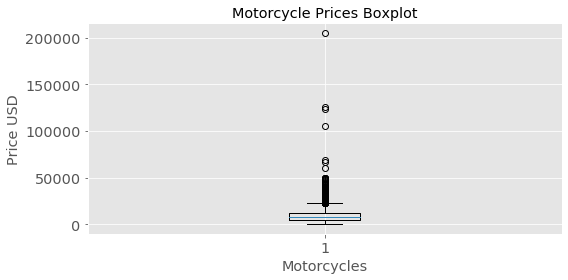

In [12]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [13]:
plt.hist(df['year'], 100, color = 'indigo')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Motorcycle years Histogram')

Text(0.5, 1.0, 'Motorcycle years Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

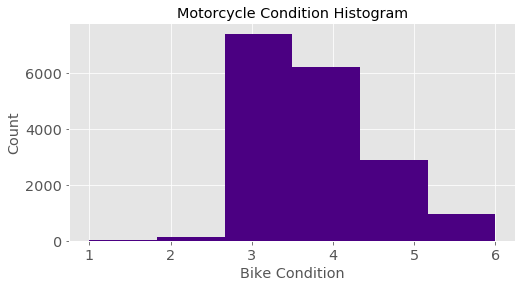

In [14]:
plt.hist(df['condition'], 6, color='indigo')
plt.xlabel('Bike Condition')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

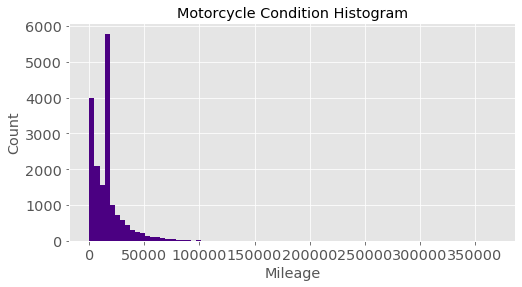

In [15]:
plt.hist(df['mileage'], 80, color= 'indigo')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

In [16]:
df.dropna(inplace=True)
plt.hist(df['bike_type'], 14, color= 'indigo')
plt.xlabel('Bike Type')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.title('Motorcycle Bike Type Histogram')

Text(0.5, 1.0, 'Motorcycle Bike Type Histogram')

In [17]:
plt.hist(df['engine_size'], 15, color = 'indigo')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.title('Motorcycle Condition Histogram')

Text(0.5, 1.0, 'Motorcycle Condition Histogram')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6958 entries, 0 to 17582
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6958 non-null   object 
 1   year            6958 non-null   float64
 2   price           6958 non-null   float64
 3   neighborhood    6958 non-null   object 
 4   description     6958 non-null   object 
 5   url             6958 non-null   object 
 6   model           6958 non-null   object 
 7   vin             6958 non-null   int64  
 8   condition       6958 non-null   int64  
 9   cryptocurrency  6958 non-null   int64  
 10  delivery        6958 non-null   int64  
 11  engine_size     6958 non-null   float64
 12  fuel_type       6958 non-null   object 
 13  mileage         6958 non-null   float64
 14  color           6958 non-null   object 
 15  street_legal    6958 non-null   int64  
 16  title_status    6958 non-null   object 
 17  transmission    6958 non-null   

In [19]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [21]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.6374270472693335
Out of Bag Score :  	 0.6093465243739122
Root Mean Squared Error :  3413.2521659947515


In [22]:
np.sqrt(mean_squared_error(y1_test, y_pred))

3413.2521659947515

In [23]:
for idx,_ in enumerate(y1_test - y_pred):
    print(y1_test[idx], '\t\t',':',_)

14950.0 		 : 2540.8899999999994
5900.0 		 : -6121.860000000001
800.0 		 : -82.65118055555536
4800.0 		 : -108.78999999999996
500.0 		 : -2469.345
3800.0 		 : -263.0050000000001
6250.0 		 : -602.1750000000002
9000.0 		 : 1996.835
11000.0 		 : 3907.34
9800.0 		 : -1583.9799999999996
8399.0 		 : 1513.557690476191
10000.0 		 : 1119.7199999999993
10000.0 		 : 3291.4049999999997
8800.0 		 : 5808.455
5500.0 		 : -195.8100000000004
13500.0 		 : 1161.8349999999991
6999.0 		 : 684.205654761904
15300.0 		 : 7271.325
1850.0 		 : -378.9000000000001
5500.0 		 : -325.6800000000003
7500.0 		 : -10964.915
14000.0 		 : 295.1025000000009
24900.0 		 : 8843.78
4900.0 		 : 634.1066666666666
5000.0 		 : -2019.6149999999998
1595.0 		 : -156.06999999999994
4300.0 		 : -343.33500000000004
9499.0 		 : 1057.6599999999999
8000.0 		 : 4611.77
4995.0 		 : -244.1800000000003
6500.0 		 : -211.65999999999985
8300.0 		 : -354.13816666666935
6988.0 		 : 58.55000000000018
4500.0 		 : -191.30000000000018
4750.0 		 : -739.7

3595.0 		 : 47.983333333333576
20995.0 		 : 2841.1100000000006
7200.0 		 : 85.53499999999985
4000.0 		 : 544.04
4299.0 		 : -231.47000000000025
6500.0 		 : -2030.67
3900.0 		 : 930.7150000000001
8500.0 		 : -1482.8850000000002
6300.0 		 : -740.3000000000002
17000.0 		 : -6056.950000000001
8000.0 		 : -1294.9750000000004
7195.0 		 : -2554.3500000000004
13950.0 		 : 3459.2350000000006
7650.0 		 : 391.6949999999997
3795.0 		 : -4426.9575
5500.0 		 : -2479.7299999999996
2550.0 		 : 42.710000000000036
26000.0 		 : 2117.0499999999993
10900.0 		 : 945.5149999999994
11799.0 		 : 231.45000000000073
9995.0 		 : 1778.2549999999992
900.0 		 : -1629.63
8500.0 		 : -709.0100000000002
4500.0 		 : -1810.4250000000002
3495.0 		 : -336.2750000000001
5000.0 		 : 1685.754166666667
8200.0 		 : -922.3649999999998
11500.0 		 : -8226.035
11500.0 		 : -352.375
6000.0 		 : -2012.0150000000003
7900.0 		 : 1416.4099999999999
4495.0 		 : 807.0900000000001
4000.0 		 : -1132.2150000000001
12995.0 		 : 6337.425999999

9800.0 		 : -2320.6849999999995
8700.0 		 : 680.0600000000004
9500.0 		 : 1322.9350000000004
5500.0 		 : -500.08500000000004
12000.0 		 : -325.5116666666654
7700.0 		 : 1438.6049999999996
6900.0 		 : 2208.615
5800.0 		 : -443.5500000000002
2995.0 		 : -1093.875
17222.0 		 : -848.194523809525
2250.0 		 : -1015.1350000000002
7499.0 		 : 167.96000000000004
6800.0 		 : -578.8450000000003
8000.0 		 : 4338.844999999999
14995.0 		 : 3648.295
9999.0 		 : -2498.540000000001
13799.0 		 : -399.5799999999999
8995.0 		 : -699.6100000000006
6999.0 		 : -5767.469999999999
7750.0 		 : -1652.9899999999998
5500.0 		 : -1101.8450000000003
3000.0 		 : -6092.3150000000005
16000.0 		 : 3423.0300000000007
5500.0 		 : -1825.8500000000004
40000.0 		 : 23327.468333333334
12000.0 		 : 5420.16
11999.0 		 : -0.694999999999709
9250.0 		 : -2107.504999999999
8500.0 		 : -1362.8999999999996
3500.0 		 : -180.65999999999985
4800.0 		 : 413.3850000000002
15250.0 		 : -403.51833333333525
12500.0 		 : 5746.31
5000.0 		 : 

7995.0 		 : -2850.0499999999993
9500.0 		 : 1954.4750000000004
9500.0 		 : -1590.0
12750.0 		 : 1849.1299999999992
24795.0 		 : 2046.2400000000016
3000.0 		 : -2926.748333333334
3800.0 		 : -41.039999999999964
4599.0 		 : -2632.13
6000.0 		 : 1418.245
6250.0 		 : 547.5500000000002
4495.0 		 : 394.5550000000003
6900.0 		 : -389.3699999999999
4500.0 		 : -92.98999999999978
2900.0 		 : 199.81500000000005
6500.0 		 : 37.975000000000364
11975.0 		 : 614.7800000000007
12000.0 		 : -4467.555
10800.0 		 : 1547.8850000000002
3500.0 		 : -553.0999999999999
9999.0 		 : -146.71999999999935
16500.0 		 : 2253.83
3600.0 		 : -1535.2783333333327
4995.0 		 : -131.39500000000044
5200.0 		 : -1602.9849999999997
16669.0 		 : -2050.2599999999984
13900.0 		 : 34.51499999999942
11500.0 		 : 216.59000000000015
900.0 		 : -1265.2150000000001
7200.0 		 : 597.7250000000004
3000.0 		 : 395.34000000000015
5750.0 		 : -4287.17
12000.0 		 : 1220.25
13495.0 		 : 2955.5750000000007
14995.0 		 : 4828.84
7995.0 		 : 165

No handles with labels found to put in legend.


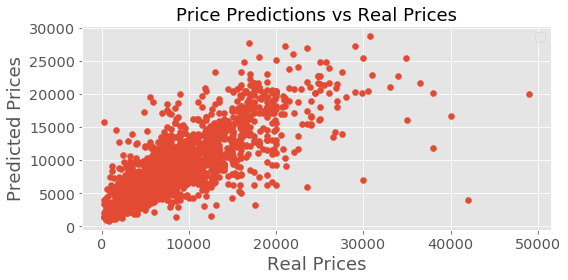

In [24]:
plt.scatter(y1_test, y_pred)
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [25]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [46]:
for idx, i in enumerate(df['price']):
    if i > 40000:
        df.drop(idx, axis=0, inplace = True)

In [104]:
df = df.reset_index(drop=True)

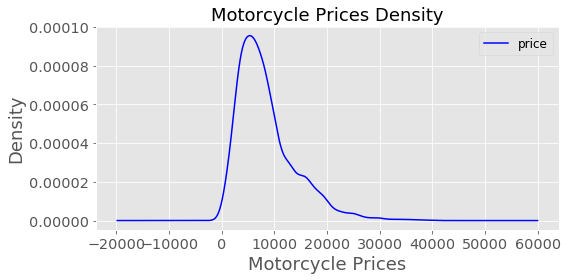

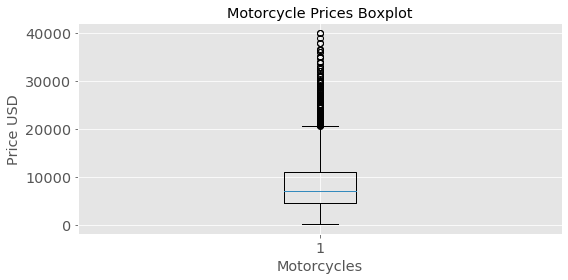

In [48]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

In [49]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [50]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [51]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error : ', mean_squared_error(y1_test, y_pred))

R Squared :  		 0.6604630889683087
Out of Bag Score :  	 0.624411888099671
Mean Squared Error :  10580940.740775822


In [52]:
np.sqrt(mean_squared_error(y1_test, y_pred))

3252.835799848468

In [53]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [54]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


In [55]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


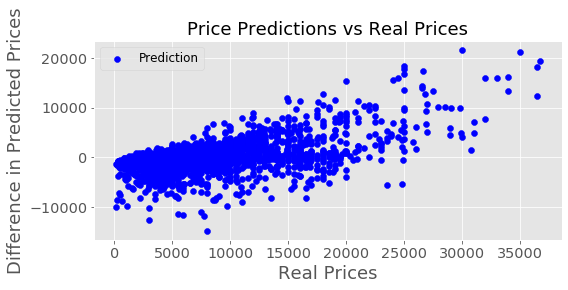

In [56]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

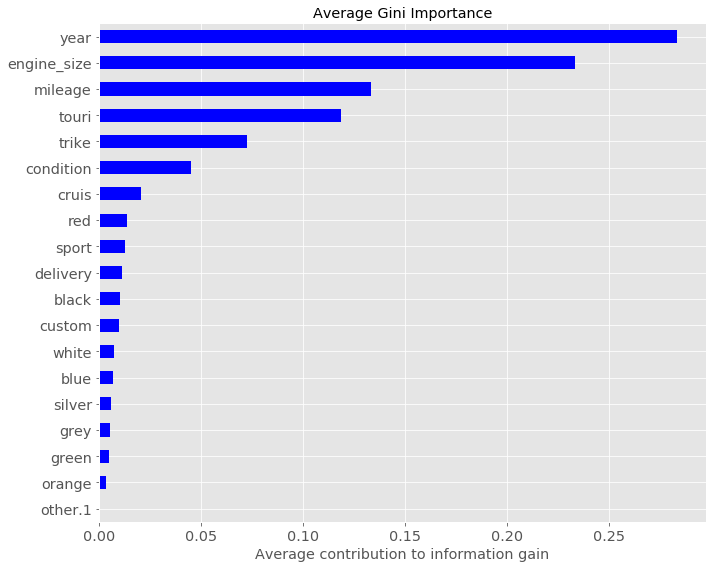

In [57]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [58]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [59]:
pos_or_neg

['over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -'

In [60]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [61]:
analysis_df['diff'] = diff

In [62]:
analysis_df['diff_percent'] = diff_percent

In [63]:
analysis_df['pos_or_neg'] = pos_or_neg

In [64]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 6892 to 6410
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2295 non-null   object 
 1   year            2295 non-null   float64
 2   price           2295 non-null   float64
 3   neighborhood    2295 non-null   object 
 4   description     2295 non-null   object 
 5   url             2295 non-null   object 
 6   model           2295 non-null   object 
 7   vin             2295 non-null   int64  
 8   condition       2295 non-null   int64  
 9   cryptocurrency  2295 non-null   int64  
 10  delivery        2295 non-null   int64  
 11  engine_size     2295 non-null   float64
 12  fuel_type       2295 non-null   object 
 13  mileage         2295 non-null   float64
 14  color           2295 non-null   object 
 15  street_legal    2295 non-null   int64  
 16  title_status    2295 non-null   object 
 17  transmission    2295 non-null 

In [65]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [66]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 6892 to 6410
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2295 non-null   object 
 1   pos_or_neg      2295 non-null   object 
 2   diff            2295 non-null   float64
 3   diff_percent    2295 non-null   float64
 4   price           2295 non-null   float64
 5   year            2295 non-null   float64
 6   mileage         2295 non-null   float64
 7   engine_size     2295 non-null   float64
 8   condition       2295 non-null   int64  
 9   neighborhood    2295 non-null   object 
 10  description     2295 non-null   object 
 11  url             2295 non-null   object 
 12  model           2295 non-null   object 
 13  vin             2295 non-null   int64  
 14  cryptocurrency  2295 non-null   int64  
 15  delivery        2295 non-null   int64  
 16  fuel_type       2295 non-null   object 
 17  color           2295 non-null 

In [67]:
adf_idx = analysis_df['diff'].sort_values().index

In [68]:
df.engine_size[1879]

1683.0

In [69]:
analysis_df.loc[adf_idx][-50:]

title pos_or_neg  \
3154                                        2016 Harley     over +   
5301        2008 HD Sportster Custom w/Trike Conversion    short -   
4382              2017 Harley Road Glide Bagger Special     over +   
944                      2001 American Ironhorse Ranger    short -   
6556                2016 Harley Davidson Road Glide CVO     over +   
3902            2018 Harley-Davidson® Trike Freewheeler     over +   
634   2013 Harley davidson deluxe softail bagger cho...     over +   
4908                           2016 Harley Davidson CVO     over +   
1856                              Old school 1999 Trike    short -   
3976  2009 Harley Davidson Screaming Eagle Softtail ...     over +   
3780                          2020 Ducati Panigale V4 S     over +   
5082               2013 Harley Davidson Tri Glide Trike     over +   
3936                                2012 HONDA    TRIKE     over +   
4712                        2018 BMW R 1200GS Exclusive     over +   
1593                                 2001 Custom Bagger     over +   
2048  2016 HARLEY DAVIDSON ROAD GLIDE SPECIAL TOTAL ...     over +   
4629                         2018 Kawasaki Vulcan 900cc    short -   
5478                         2020 Ural Gear-UP OD Green     over +   
6748                                2004 honda goldwing     over +   
1294                                      2008 Tahoe Lt     over +   
3391                   1999 FXST Custom Harley Davidson     over +   
4934                 2003 Harley Sportster Lehman Trike    short -   
144                                 2011 Custom chopper    short -   
1065  2004 Honda Valkyrie Rune _ LTD Production Bike...     over +   
6151  2019 HD • GUARANTEE FINANCING FREE NATIONWIDE ...    short -   
4346                        2004 bourget python chopper     over +   
5324       2019 Harley-Davidson FLHXSE CVO Street Glide     over +   
4915                                      2016 CSC Zong    short -   
4550  2017 Harley Davidson CVO Street Glide 114"    ...     over +   
661                  2001 Custom Harley Davidson Fatboy     over +   
3673              2018 Harley Davidson CVO Street Glide     over +   
5194                          2020 Harley Ultra Limited     over +   
6786                          2014 Harley Limited Trike     over +   
5787  2012 Harley-Davidson flhtcuse7 cvo ultra class...     over +   
4004                          2014 Honda goldwing trike     over +   
4413                                  08' H-D Road King    short -   
347                 1970 Harley Davidson FLH Shovelhead     over +   
521              2014 Harley Davidson Ultra Classic CVO     over +   
3276                             2018 Custom Road glide     over +   
3681   1984 Harley-Davidson FXRT Sport Glide – Restomod     over +   
5376                       2012 Boss Hoss Gangsta Trike     over +   
6671                          2020 VANDERHALL VENICE GT     over +   
718                            2014 Street Glide bagger     over +   
562                      2016 Harley Tri-glide FLHTCUTG     over +   
2139                   2006 Ducati Paul Smart Race Bike     over +   
2115  1947 Harley Davidson Deluxe Orignal Paint Rebu...     over +   
2560                   2006 DUCATI PAUL SMART RACE BIKE     over +   
613                           2007 Campagna T-Rex 1400R     over +   
5018                   2018 Harley Street Glide Special     over +   
5826                             Custom 2010 Road Glide     over +   

              diff  diff_percent    price    year       mileage  engine_size  \
3154   9750.840000      0.527072  18500.0  2016.0  14077.353486   895.523694   
5301   9785.050000      1.008768   9700.0  2008.0   2800.000000   895.523694   
4382   9943.550000      0.333676  29800.0  2017.0   3115.000000   107.000000   
944    9947.275000     99.472750    100.0  2001.0  14077.353486   895.523694   
6556   9983.855000      0.344271  29000.0  2016.0   2338.000000   110.000000   

In [70]:
df = df[df.engine_size != 895.5236939583598]

In [71]:
len(df)

5295

In [83]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y1 = df['price']

In [84]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [85]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.7411240493462781
Out of Bag Score :  	 0.7227575507770323
Mean Squared Error Score :  2665.4938871882823


In [86]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

No handles with labels found to put in legend.


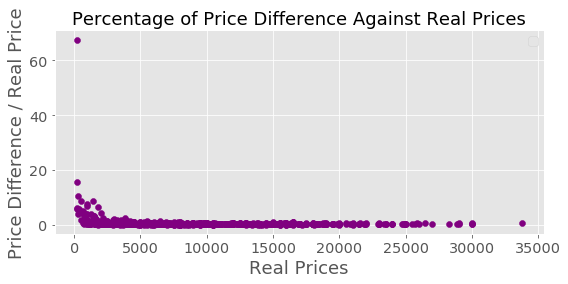

In [87]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

No handles with labels found to put in legend.


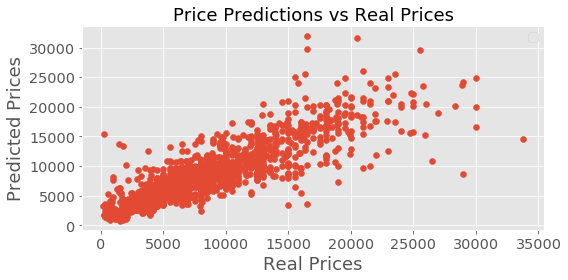

In [88]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

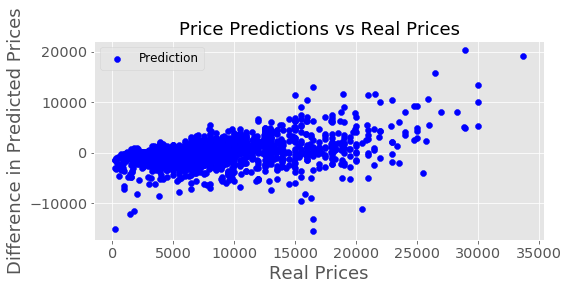

In [89]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

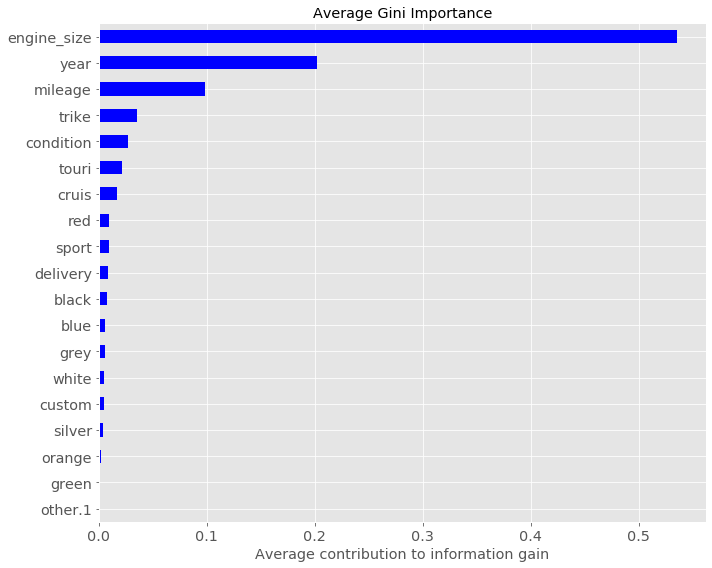

In [90]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [91]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('over +')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('short -')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [92]:
pos_or_neg

['short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'over +',
 'short -',
 'short -',
 'over +',
 'over +',
 'over +',
 'short -',
 'short -',
 'over +',
 'short -',
 'short -',
 'short -',
 'over +',
 'short -',
 'over +',
 'shor

In [93]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [94]:
analysis_df['diff'] = diff

In [95]:
analysis_df['diff_percent'] = diff_percent

In [96]:
analysis_df['pos_or_neg'] = pos_or_neg

In [97]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 6863 to 1450
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1748 non-null   object 
 1   year            1748 non-null   float64
 2   price           1748 non-null   float64
 3   neighborhood    1748 non-null   object 
 4   description     1748 non-null   object 
 5   url             1748 non-null   object 
 6   model           1748 non-null   object 
 7   vin             1748 non-null   int64  
 8   condition       1748 non-null   int64  
 9   cryptocurrency  1748 non-null   int64  
 10  delivery        1748 non-null   int64  
 11  engine_size     1748 non-null   float64
 12  fuel_type       1748 non-null   object 
 13  mileage         1748 non-null   float64
 14  color           1748 non-null   object 
 15  street_legal    1748 non-null   int64  
 16  title_status    1748 non-null   object 
 17  transmission    1748 non-null 

In [98]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name4, fourth_col)
analysis_df.insert(6, col_name5, fifth_col)
analysis_df.insert(7, col_name6, sixth_col)
analysis_df.insert(8, col_name7, seventh_col) 

In [99]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 6863 to 1450
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1748 non-null   object 
 1   pos_or_neg      1748 non-null   object 
 2   diff            1748 non-null   float64
 3   diff_percent    1748 non-null   float64
 4   price           1748 non-null   float64
 5   year            1748 non-null   float64
 6   mileage         1748 non-null   float64
 7   engine_size     1748 non-null   float64
 8   condition       1748 non-null   int64  
 9   neighborhood    1748 non-null   object 
 10  description     1748 non-null   object 
 11  url             1748 non-null   object 
 12  model           1748 non-null   object 
 13  vin             1748 non-null   int64  
 14  cryptocurrency  1748 non-null   int64  
 15  delivery        1748 non-null   int64  
 16  fuel_type       1748 non-null   object 
 17  color           1748 non-null 

In [100]:
adf_idx = analysis_df['diff'].sort_values().index

In [101]:
len(analysis_df)

1748

In [102]:
analysis_df.loc[adf_idx][-50:]

title pos_or_neg  \
3733            2020 Tao Motors DB X 1 140cc Dirt Bikes    short -   
1370                                           1986 FXR     over +   
6787      2007 Harley Davidson Ultra & Handicap Sidecar     over +   
2556                             KAWASAKI NINJA H2 SXSE     over +   
4546                    2016 Harley Davidson Street-Bob    short -   
6345                  2001 Harley Davidson Electraglide     over +   
6150                     2011 VW Custom Trike w/Trailer    short -   
1832                                 2015 Can-Am Spyder     over +   
2652                2004 Honda Rune - Black - Excellent     over +   
3063                                        2004 custom     over +   
2294                                       2008 Scooter    short -   
1584                                 03  Yamaha Warrior    short -   
1689                                    2015 BMW 1200GS     over +   
4383                     Custom 2016 Triumph Thruxton R     over +   
4609                2018 Kawasaki Vulcan Voyager 1700cc    short -   
4934                 2003 Harley Sportster Lehman Trike    short -   
3562                      2013 Harley Ultra Classic CVO     over +   
3707           2015 Harly tri Glide ultra classic trike     over +   
3491                2011 CVO Ultra Classic Electriglide     over +   
5529  2017 HARLEY DAVIDSON TRI GLIDE ULTRA 3K MILES ...     over +   
6083  2019 Harley Davidson Soft-Tail slim FLSL  moto...     over +   
2169  2012 KAWASAKI VOYAGER ABS.  CLEAN ALL ORIGINAL...    short -   
518                    2019 KAWASAKI VULCAN VAQUERO ABS    short -   
820                          2004 Yamaha V-Star Classic    short -   
2379                 2001 Harley Davidson Electra glide     over +   
747     Harley Davidson 2014 VROD Night Special VRSCDX.     over +   
3808                   New 2018 Honda GoldWing like F6B    short -   
4074                         2014 Harley Davidson Trike     over +   
1781                                     2010 Honda CSC     over +   
1979              2018 Harley Davidson Heritage Softail    short -   
5646  2018 Harley-Davidson Triglide Ultra Classic FL...     over +   
4374                  Harley Davidson Road Glide - 2012     over +   
3391                   1999 FXST Custom Harley Davidson     over +   
2371    2018 Ducati Panigale V4S Warranty and Financing     over +   
128                         2013 Harley Davisdson Ultra     over +   
4411                        2020 Custom Trike 3 Wheeler    short -   
5901                                  2007 Harley Trike     over +   
1294                                      2008 Tahoe Lt     over +   
5454  2020 Terracotta Ural Gear Up w/black engine & ...     over +   
2054  1972 Rupp Hustler Mini Bike ! Great Condition ...    short -   
707   1922 BSA Model H2 * Veteran Antique * Restored...     over +   
1823                                 2015 Honda CRF110F    short -   
6408                               2017 HARLEY DAVIDSON     over +   
4813      2018 Harley Davidson Softail Heritage Classic    short -   
5601  1939 Harley-Davidson U Big Twin Flathead Flat ...     over +   
3881  2015 Victory Cross Country Tour - Payments low as    short -   
6263                      2019 Harley Breakout For Sale    short -   
5787  2012 Harley-Davidson flhtcuse7 cvo ultra class...     over +   
645                                 2006 Campagna T-Rex     over +   
4369     2005 Campagna T-Rex Motorcycle CanAm Slingshot     over +   

              diff  diff_percent    price    year       mileage  engine_size  \
3733   6642.358024      6.649007    999.0  2020.0  14077.353486        140.0   
1370   6677.900000      0.556492  12000.0  1986.0     30.000000         88.0   
6787   6740.400000      0.434865  15500.0  2007.0  14462.000000       1762.0   
2556   6787.253333      0.377070  18000.0  2020.0    957.000000        999.0   
4546   6790.495000      0.646714  10500.0  2016.0  14077.353486       1800.0   

In [ ]:
analysis_df['mileage'][1:2]

In [103]:
df = df[df.mileage != 14077.35348599088]
df = df[df.engine_size > 45]

In [ ]:
len(df)

In [ ]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y1 = df['price']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [112]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

R Squared :  		 0.7411240493462781
Out of Bag Score :  	 0.7227575507770323
Mean Squared Error Score :  2665.4938871882823


In [ ]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [ ]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
plt.scatter(y1_test, diff, color='b', label = 'Prediction')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [ ]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('short -')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('over +')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [ ]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [ ]:
analysis_df['diff'] = diff

In [ ]:
analysis_df['diff_percent'] = diff_percent

In [ ]:
analysis_df['pos_or_neg'] = pos_or_neg

In [ ]:
analysis_df['y_pred'] = y_pred

In [ ]:
analysis_df.info()

In [ ]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name3 = 'y_pred'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
third_col = analysis_df.pop(col_name3)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name3, third_col)
analysis_df.insert(6, col_name4, fourth_col)
analysis_df.insert(7, col_name5, fifth_col)
analysis_df.insert(8, col_name6, sixth_col)
analysis_df.insert(9, col_name7, seventh_col) 

In [105]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 6863 to 1450
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1748 non-null   object 
 1   pos_or_neg      1748 non-null   object 
 2   diff            1748 non-null   float64
 3   diff_percent    1748 non-null   float64
 4   price           1748 non-null   float64
 5   year            1748 non-null   float64
 6   mileage         1748 non-null   float64
 7   engine_size     1748 non-null   float64
 8   condition       1748 non-null   int64  
 9   neighborhood    1748 non-null   object 
 10  description     1748 non-null   object 
 11  url             1748 non-null   object 
 12  model           1748 non-null   object 
 13  vin             1748 non-null   int64  
 14  cryptocurrency  1748 non-null   int64  
 15  delivery        1748 non-null   int64  
 16  fuel_type       1748 non-null   object 
 17  color           1748 non-null 

In [110]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [111]:
len(analysis_df)

1748

In [108]:
analysis_df.loc[adf_idx][-50:]

title pos_or_neg  \
1755                         1988 Yamaha Venture Royale    short -   
5104                           Suzuki Cavalcade LX 1987    short -   
3084                2018 Bintelli Sprint Moped for sale    short -   
2706                          Islander black model 2013    short -   
166                          HONDA 1980 VINTAGE CB125SA    short -   
3369                                         1989 fxstc    short -   
3393                  1968 Bridgestone 175cc motorcycle    short -   
538                          2012 Suzuki Boulevard M50T    short -   
3222                        Honda Helix scooter    2000    short -   
4934                 2003 Harley Sportster Lehman Trike    short -   
3186                                 2019 125cc Hellcat    short -   
2589                     50cc 2019 JiaJue Gator Scooter    short -   
4078                                 2009 Vulcan VN900B    short -   
197                                Suzuki Boulevard M50    short -   
2305  New 2020 Road Legal Gas Powered Scooters w/ Fr...    short -   
898                      2008 Lance Milan 150cc Scooter    short -   
211                      2014 Honda CTX1300DE V4 Engine    short -   
5279                      1988 Yamaha Riva 125Z scooter    short -   
6215                2009 Honda Silverwing sale or trade    short -   
2238                               2011 Kawasaki Vulcan    short -   
1856                              Old school 1999 Trike    short -   
820                          2004 Yamaha V-Star Classic    short -   
3657                                        1980 cb900c    short -   
3432                           1985 Harley Davidson FLT    short -   
6568          Genze 2.0 electric scooter and buddy 170i    short -   
719                                    2010 honda elite    short -   
6293                      2015 yamaha R3 *PROJECT BIKE*    short -   
2144  2008 GENUINE SCOOTER BUDDY florida registratio...    short -   
6756  1965 HONDA CUB SUPER CUB MOPED/SCOOTER MOTORCY...    short -   
4923                                  2001 Honda XR100R    short -   
6549                                    2006 yamaha fz6    short -   
2149                              1997 kawasaki voyager    short -   
4416                                   Zuma Yamaha 2007    short -   
557                               1988 Honda aero moped    short -   
6132                                  1983 Yamaha 225DX    short -   
3599                                   1971 Hodaka 100B    short -   
2169  2012 KAWASAKI VOYAGER ABS.  CLEAN ALL ORIGINAL...    short -   
4246                                 1979 Suzuki GS750N    short -   
4128                                  97 Honda goldwing    short -   
5897                    2003 defiant 250cc motorcycle!!    short -   
2929                                   1973 HUSKY 250CC    short -   
690                      2015 Tao Tao Zummer 50cc*/sold    short -   
2054  1972 Rupp Hustler Mini Bike ! Great Condition ...    short -   
3733            2020 Tao Motors DB X 1 140cc Dirt Bikes    short -   
2294                                       2008 Scooter    short -   
1823                                 2015 Honda CRF110F    short -   
5859    Tao Motors DB 20 Dirtbike (Assembled - No fees)    short -   
2930                              1971 OSSA PARTS  BIKE    short -   
3792                                06 Schwinn Graduate    short -   
3881  2015 Victory Cross Country Tour - Payments low as    short -   

              diff  diff_percent   price    year        mileage  engine_size  \
1755   2310.290000      1.155145  2000.0  1988.0   14077.353486       1300.0   
5104   2892.665000      1.157066  2500.0  1987.0  108380.000000       1400.0   
3084   1013.250000      1.192059   850.0  2018.0   14077.353486         50.0   
2706    955.875000      1.194844   800.0  2013.0    5200.000000         50.0   
166    3032.725000      1.237847  2450.0  1980.0    6957.000000        125.0   

In [109]:
df.drop([10359, 3644, 15600], inplace=True)

KeyError: '[10359 15600] not found in axis'

In [ ]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'brown', 'stand', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y1 = df['price']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=200, oob_score=True)
rf1.fit(X1_train, y1_train)
y_pred = rf1.predict(X1_test)

In [ ]:
print('R Squared : ','\t\t', rf1.score(X1_test, y1_test))
print('Out of Bag Score : ','\t', rf1.oob_score_)
print('Mean Squared Error Score : ', np.sqrt(mean_squared_error(y1_test, y_pred)))

In [ ]:
diff_percent = []
diff = []
for idx,_ in enumerate(y1_test):
    diff_ = _-y_pred[idx]
    diff.append(diff_)
    diff_percent.append(100*abs(diff_/_))

In [ ]:
plt.scatter(y1_test, diff_percent, color='purple')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Price Difference / Real Price", fontsize=18);
plt.title("Percentage of Price Difference Against Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
plt.scatter(y1_test, y_pred)

plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
plt.scatter(y1_test, diff, color='b')
plt.legend(fontsize=12)
plt.xlabel("Real Prices", fontsize=18)
plt.ylabel("Difference in Predicted Prices", fontsize=18);
plt.title("Price Predictions vs Real Prices", fontsize=18);
plt.tight_layout()

In [ ]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'brown', 'stand', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'dirtb', 'stree', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [ ]:
diff_percent = []
diff = []
pos_or_neg = []
for idx,_ in enumerate(y1_test):
    diff_ = abs(_-y_pred[idx])
    if _-y_pred[idx] > 0:
        pos_or_neg.append('short -')
    elif _-y_pred[idx] < 0:
        pos_or_neg.append('over +')
    else:
        pos_or_neg.append('')
    
    diff.append(diff_)
    diff_percent.append(abs(diff_/_))

In [ ]:
y_indices = []
for idx, _ in enumerate(y1_test):
    y_indices.append((y1_test.index[idx]))


analysis_df = pd.DataFrame(df.loc[[i for i in y_indices]])

# y1_test.index[9000]
# y_indices

In [ ]:
analysis_df['diff'] = diff

In [ ]:
analysis_df['diff_percent'] = diff_percent

In [ ]:
analysis_df['pos_or_neg'] = pos_or_neg

In [ ]:
analysis_df['y_pred'] = y_pred

In [ ]:
analysis_df.info()

In [ ]:
col_name0 = 'pos_or_neg'
col_name1 = 'diff'
col_name2 = 'diff_percent'
col_name3 = 'y_pred'
col_name4 = 'year'
col_name5 = 'mileage'
col_name6 = 'engine_size'
col_name7 = 'condition'
zero_col = analysis_df.pop(col_name0)
first_col = analysis_df.pop(col_name1)
sec_col = analysis_df.pop(col_name2)
third_col = analysis_df.pop(col_name3)
fourth_col = analysis_df.pop(col_name4)
fifth_col = analysis_df.pop(col_name5)
sixth_col = analysis_df.pop(col_name6)
seventh_col = analysis_df.pop(col_name7)
analysis_df.insert(1, col_name0, zero_col)
analysis_df.insert(2, col_name1, first_col)
analysis_df.insert(3, col_name2, sec_col)
analysis_df.insert(5, col_name3, third_col)
analysis_df.insert(6, col_name4, fourth_col)
analysis_df.insert(7, col_name5, fifth_col)
analysis_df.insert(8, col_name6, sixth_col)
analysis_df.insert(9, col_name7, seventh_col) 

In [ ]:
analysis_df.info()

In [ ]:
adf_idx = analysis_df['diff_percent'].sort_values().index

In [ ]:
analysis_df.loc[adf_idx][-50:]

In [ ]:
X = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

model = GradientBoostingRegressor(n_estimators=980, 
                                max_depth=6,
                                learning_rate=.01, 
                                min_samples_leaf=2,
                                min_samples_split=3)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('R Squared : ', model.score(X_test, y_test))
print('RMSE \t\t: ', round(np.sqrt(mean_squared_error(y_test, y_hat))),2)

In [ ]:
feat_scores = pd.Series(model.feature_importances_,
                           index=df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [ ]:
plt.hist(df['engine_size'], 15, color = 'indigo')
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.title('Motorcycle Engine Size Histogram')

In [ ]:
# condition = df['condition'].unique()
# for con in condition:
#     plt.plot(df.loc[df.condition==con,'year'], 
#              df.loc[df.condition==con,'price'], 
#              linestyle='',
#              marker='o',
#              alpha=.1,
#              label="condition="+str(con))
# plt.xlabel('year')
# plt.ylabel('price')
# plt.legend(numpoints=1)

In [ ]:
num_vars = ['price', 'engine_size', 'mileage', 'co']

In [ ]:
X = df.drop(['condition', 'moped', 'cafe ', 'stand', 'dirtb', 'stree', 'dual-', 'other', 'scoot', 'bobbe',
             'chopp', 'sport', 'delivery', 'cruis', 'trike', 'touri',  
             'price', 'title', 'neighborhood', 'description', 'url', 'model', 
             'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 
             'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 
             'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 
             'white', 'blue', 'custom', 'black', 'red'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

model = GradientBoostingRegressor(n_estimators=980, 
                                max_depth=6,
                                learning_rate=.01, 
                                min_samples_leaf=2,
                                min_samples_split=3)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('R Squared : ', model.score(X_test, y_test))
print('MSE : ', round(np.sqrt(mean_squared_error(y_test, y_hat))),2)

In [ ]:
feat_scores = pd.Series(model.feature_importances_,
                           index=df.drop(['condition', 'moped', 'cafe ', 'stand', 'dirtb', 'stree', 'dual-', 'other', 'scoot', 'bobbe',
             'chopp', 'sport', 'delivery', 'cruis', 'trike', 'touri',  
             'price', 'title', 'neighborhood', 'description', 'url', 'model', 
             'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 
             'transmission', 'bike_type', 'electric', 'brown', 'purple', 'vin', 'hybrid', 
             'diesel', 'yellow', 'gas', 'other.1', 'orange', 'green', 'grey', 'silver', 
             'white', 'blue', 'custom', 'black', 'red'], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [115]:
df = df[df.condition != 6]
df = df[df.year != 2020]


In [116]:
df = df[df.mileage != 14077.35348599088]
df = df[df.engine_size > 45]
df.condition

0       5
1       4
2       3
3       4
4       4
       ..
4728    5
4730    5
4731    5
4732    5
4733    3
Name: condition, Length: 4350, dtype: int64

In [117]:
X = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'cryptocurrency', 'fuel_type', 'color', 'title_status', 'street_legal', 'transmission', 'bike_type', 'other', 'electric', 'dual-', 'brown', 'stand', 'bobbe', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'diesel', 'scoot', 'yellow', 'chopp', 'dirtb', 'stree', 'gas'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

model = GradientBoostingRegressor(n_estimators=980, 
                                max_depth=6,
                                learning_rate=.01, 
                                min_samples_leaf=2,
                                min_samples_split=3)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('R Squared : ', model.score(X_test, y_test))
print('RMSE \t\t: ', round(np.sqrt(mean_squared_error(y_test, y_hat))),2)

R Squared :  0.776460753812572
RMSE 		:  2571.0 2


In [ ]:
2571
